In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os 
os.chdir('/content/drive/My Drive/Mestrado/2021.1/Redes Neurais Artificiais/RNA/')

Mounted at /content/drive


In [ ]:
from models import utils, metrics, plots, pipelineClassifier
from models.classifiers.RBFClassifier import *

from sklearn.datasets import load_iris, load_breast_cancer
import pandas as pd
import numpy as np
import random
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Iris

In [ ]:
data = load_iris()
df_iris = pd.DataFrame(data.data, columns=data.feature_names)
df_iris['target'] = pd.Series(data.target)

### Logistica

In [ ]:
pipe = pipelineClassifier.make_pipeline(
    model_name = 'RBF',
    n_realizations = 20, 
    task='multiclass_classification',
    func_ativacao_personalizada='logistic',
    qtd_classes=3
    
)

acc_artificial_iris, desvio_padrao_artificial_iris, realization_select_artificial_iris, dict_realizations_artificial_iris = pipe.run_realizations(
    
    df=df_iris, 
    k_fold=5, 
    param_grid={'qt_neurons_hide': [5, 3, 10], 'sigma': [2, 0.1, 3]}, 
    col_target='target', 
    train_size=0.8, 
    stratify=True, 
    normalize=True
)




-----------------------------------------------------------------------------------------------------------------------------
Realização: 0
Start Grid Search k-fold: 5
Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 1
Start Grid Search k-fold: 5
Taxa de Acerto: 0.9333333333333333
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 2
Start Grid Search k-fold: 5
Taxa de Acerto: 0.9333333333333333
-----------------------------------------------------------------------------------------------------------------------------



----------------

In [ ]:
best_perceptron_artificial_iris = realization_select_artificial_iris['classifier']
best_train_data_iris = realization_select_artificial_iris['train_data']
best_train_data_iris = realization_select_artificial_iris['test_data']
taxa_acerto_iris = realization_select_artificial_iris['taxa_acerto']

print(f'Artificial\nAcurácia: {acc_artificial_iris}\nDesvio Padrao: {desvio_padrao_artificial_iris}')

print('\n- Info best model')
print(f'Taxa Acerto: {taxa_acerto_iris}')

Artificial
Acurácia: 0.9533333333333331
Desvio Padrao: 0.03134415639877515

- Info best model
Taxa Acerto: 0.9666666666666667


### Tangente

In [ ]:
pipe = pipelineClassifier.make_pipeline(
    model_name = 'RBF',
    n_realizations = 20, 
    task='multiclass_classification',
    func_ativacao_personalizada='tangente',
    qtd_classes=3
    
)

acc_artificial_iris, desvio_padrao_artificial_iris, realization_select_artificial_iris, dict_realizations_artificial_iris = pipe.run_realizations(
    
    df=df_iris, 
    k_fold=5, 
    param_grid={'qt_neurons_hide': [5, 3, 10], 'sigma': [2, 0.1, 3]}, 
    col_target='target', 
    train_size=0.8, 
    stratify=True, 
    normalize=True
)




-----------------------------------------------------------------------------------------------------------------------------
Realização: 0
Start Grid Search k-fold: 5
Taxa de Acerto: 0.9
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 1
Start Grid Search k-fold: 5
Taxa de Acerto: 0.9666666666666667
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 2
Start Grid Search k-fold: 5
Taxa de Acerto: 0.9
-----------------------------------------------------------------------------------------------------------------------------



-------------------------------

In [ ]:
best_perceptron_artificial_iris = realization_select_artificial_iris['classifier']
best_train_data_iris = realization_select_artificial_iris['train_data']
best_train_data_iris = realization_select_artificial_iris['test_data']
taxa_acerto_iris = realization_select_artificial_iris['taxa_acerto']

print(f'Artificial\nAcurácia: {acc_artificial_iris}\nDesvio Padrao: {desvio_padrao_artificial_iris}')

print('\n- Info best model')
print(f'Taxa Acerto: {taxa_acerto_iris}')

Artificial
Acurácia: 0.9466666666666665
Desvio Padrao: 0.036514837167011066

- Info best model
Taxa Acerto: 0.9333333333333333


## Coluna Vertebral


In [ ]:
list_col_names = ['incidencia_pelvica', 
                  'inclinacao_pelvica', 
                  'angulo_lordose_lombar', 
                  'inclinacao_sacral', 
                  'radio_pelvico',
                  'grau_espondilolistese', 'target']

df_column = pd.read_csv('./datasets/vertebral_column/column_3C.dat', names = list_col_names, sep=' ')

dict_ = dict(zip(df_column['target'].unique().tolist(), range(len(df_column['target'].unique().tolist()))))

df_column['target'] = df_column['target'].apply(lambda row: dict_[row])

In [ ]:
df_column.head(6)

,incidencia_pelvica,inclinacao_pelvica,angulo_lordose_lombar,inclinacao_sacral,radio_pelvico,grau_espondilolistese,target
0,63.03,22.55,39.61,40.48,98.67,-0.25,0
1,39.06,10.06,25.02,29.00,114.41,4.56,0
2,68.83,22.22,50.09,46.61,105.99,-3.53,0
3,69.30,24.65,44.31,44.64,101.87,11.21,0
4,49.71,9.65,28.32,40.06,108.17,7.92,0
5,40.25,13.92,25.12,26.33,130.33,2.23,0


### Logistica

In [ ]:
pipe = pipelineClassifier.make_pipeline(
    
    model_name = 'RBF',
    n_realizations = 20, 
    task='multiclass_classification',
    func_ativacao_personalizada='logistic',
    qtd_classes=3
)

acc_artificial_col, desvio_padrao_artificial_col, realization_select_artificial_col, dict_realizations_artificial_col = pipe.run_realizations(
    
    df=df_column.copy(), 
    k_fold=5, 
    param_grid={'qt_neurons_hide': [5, 3, 10, 50, 100, 200], 'sigma': [2, 0.1, 3, 5, 10, 0.01]}, 
    col_target='target', 
    train_size=0.8, 
    stratify=True, 
    normalize=True
)




-----------------------------------------------------------------------------------------------------------------------------
Realização: 0
Start Grid Search k-fold: 5
Taxa de Acerto: 0.8225806451612904
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 1
Start Grid Search k-fold: 5
Taxa de Acerto: 0.6129032258064516
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 2
Start Grid Search k-fold: 5
Taxa de Acerto: 0.7419354838709677
-----------------------------------------------------------------------------------------------------------------------------



-

In [ ]:
best_perceptron_artificial_col = realization_select_artificial_col['classifier']
best_train_data_col = realization_select_artificial_col['train_data']
best_train_data_col = realization_select_artificial_col['test_data']
taxa_acerto_col = realization_select_artificial_col['taxa_acerto']

print(f'Artificial\nAcurácia: {acc_artificial_col}\nDesvio Padrao: {desvio_padrao_artificial_col}')

print('\n- Info best model')
print(f'Taxa Acerto: {taxa_acerto_col}')

Artificial
Acurácia: 0.7249999999999999
Desvio Padrao: 0.0689231243086191

- Info best model
Taxa Acerto: 0.7096774193548387


### Tangente

In [ ]:
pipe = pipelineClassifier.make_pipeline(
    
    model_name = 'RBF',
    n_realizations = 20, 
    task='multiclass_classification',
    func_ativacao_personalizada='tangente',
    qtd_classes=3
)

acc_artificial_col, desvio_padrao_artificial_col, realization_select_artificial_col, dict_realizations_artificial_col = pipe.run_realizations(
    
    df=df_column.copy(), 
    k_fold=5, 
    param_grid={'qt_neurons_hide': [5, 3, 10, 50, 100, 200], 'sigma': [2, 0.1, 3, 5, 10, 0.01]}, 
    col_target='target', 
    train_size=0.8, 
    stratify=True, 
    normalize=True
)




-----------------------------------------------------------------------------------------------------------------------------
Realização: 0
Start Grid Search k-fold: 5
Taxa de Acerto: 0.7903225806451613
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 1
Start Grid Search k-fold: 5
Taxa de Acerto: 0.7903225806451613
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 2
Start Grid Search k-fold: 5
Taxa de Acerto: 0.7419354838709677
-----------------------------------------------------------------------------------------------------------------------------



-

In [ ]:
best_perceptron_artificial_col = realization_select_artificial_col['classifier']
best_train_data_col = realization_select_artificial_col['train_data']
best_train_data_col = realization_select_artificial_col['test_data']
taxa_acerto_col = realization_select_artificial_col['taxa_acerto']

print(f'Artificial\nAcurácia: {acc_artificial_col}\nDesvio Padrao: {desvio_padrao_artificial_col}')

print('\n- Info best model')
print(f'Taxa Acerto: {taxa_acerto_col}')

Artificial
Acurácia: 0.7403225806451613
Desvio Padrao: 0.05987097506000774

- Info best model
Taxa Acerto: 0.7419354838709677


# Câncer de Mama

In [ ]:
data = load_breast_cancer()
df_cancer = pd.DataFrame(data.data, columns=data.feature_names)
df_cancer['target'] = pd.Series(data.target)

df_cancer['target'].value_counts() # 0 = 'malignant', 1 = 'benign'

1    357
0    212
Name: target, dtype: int64

### Logistica

In [ ]:
pipe = pipelineClassifier.make_pipeline(

    model_name = 'RBF',
    n_realizations = 20, 
    task='binary_classification',
    func_ativacao_personalizada='logistic',
    qtd_classes=2    

)

acc_artificial_ca, desvio_padrao_artificial_ca, realization_select_artificial_ca, dict_realizations_artificial_ca = pipe.run_realizations(
    
    df=df_cancer.copy(), 
    k_fold=5, 
    param_grid={'qt_neurons_hide': [100, 50, 200, 5], 'sigma': [5, 2, 0.1, 3]}, 
    col_target='target', 
    train_size=0.8, 
    stratify=True, 
    normalize=True
)




-----------------------------------------------------------------------------------------------------------------------------
Realização: 0
Start Grid Search k-fold: 5
Confusion Matrix: 
[[25. 17.]
 [ 1. 70.]]
Taxa de Acerto: 0.8407079646017699
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 1
Start Grid Search k-fold: 5
Confusion Matrix: 
[[23. 19.]
 [ 6. 65.]]
Taxa de Acerto: 0.7787610619469026
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 2
Start Grid Search k-fold: 5
Confusion Matrix: 
[[22. 20.]
 [ 0. 71.]]
Taxa de Acerto: 0.8230088495575221
----

In [ ]:
best_perceptron_artificial_ca = realization_select_artificial_ca['classifier']
best_train_data_ca = realization_select_artificial_ca['train_data']
best_train_data_ca = realization_select_artificial_ca['test_data']
taxa_acerto_ca = realization_select_artificial_ca['taxa_acerto']

print(f'Artificial\nAcurácia: {acc_artificial_ca}\nDesvio Padrao: {desvio_padrao_artificial_ca}')

print('\n- Info best model')
print(f'Taxa Acerto: {taxa_acerto_ca}')

Artificial
Acurácia: 0.8039823008849558
Desvio Padrao: 0.03908122469692279

- Info best model
Taxa Acerto: 0.8053097345132744


### Tangente

In [ ]:
pipe = pipelineClassifier.make_pipeline(

    model_name = 'RBF',
    n_realizations = 20, 
    task='binary_classification',
    func_ativacao_personalizada='tangente',
    qtd_classes=2    

)

acc_artificial_ca, desvio_padrao_artificial_ca, realization_select_artificial_ca, dict_realizations_artificial_ca = pipe.run_realizations(
    
    df=df_cancer.copy(), 
    k_fold=5, 
    param_grid={'qt_neurons_hide': [100, 50, 200, 5], 'sigma': [5, 2, 0.1, 3]}, 
    col_target='target', 
    train_size=0.8, 
    stratify=True, 
    normalize=True
)




-----------------------------------------------------------------------------------------------------------------------------
Realização: 0
Start Grid Search k-fold: 5
Confusion Matrix: 
[[21. 21.]
 [ 2. 69.]]
Taxa de Acerto: 0.7964601769911505
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 1
Start Grid Search k-fold: 5
Confusion Matrix: 
[[19. 23.]
 [ 0. 71.]]
Taxa de Acerto: 0.7964601769911505
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 2
Start Grid Search k-fold: 5
Confusion Matrix: 
[[24. 18.]
 [ 1. 70.]]
Taxa de Acerto: 0.831858407079646
-----

In [ ]:
best_perceptron_artificial_ca = realization_select_artificial_ca['classifier']
best_train_data_ca = realization_select_artificial_ca['train_data']
best_train_data_ca = realization_select_artificial_ca['test_data']
taxa_acerto_ca = realization_select_artificial_ca['taxa_acerto']

print(f'Artificial\nAcurácia: {acc_artificial_ca}\nDesvio Padrao: {desvio_padrao_artificial_ca}')

print('\n- Info best model')
print(f'Taxa Acerto: {taxa_acerto_ca}')

Artificial
Acurácia: 0.8132743362831857
Desvio Padrao: 0.02996219966266379

- Info best model
Taxa Acerto: 0.8141592920353983


# Dermatologia

In [ ]:
list_col_names = [
      'erythema',
      'scaling',
      'definite borders',
      'itching',
      'koebner phenomenon',
      'polygonal papules',
      'follicular papules',
      'oral mucosal involvement',
      'knee and elbow involvement',
     'scalp involvement',
     'family history',
     'melanin incontinence',
     'eosinophils in the infiltrate',
     'PNL infiltrate',
     'fibrosis of the papillary dermis',
     'exocytosis',
     'acanthosis',
     'hyperkeratosis',
     'parakeratosis',
     'clubbing of the rete ridges',
     'elongation of the rete ridges',
     'thinning of the suprapapillary epidermis',
     'spongiform pustule',
     'munro microabcess',
     'focal hypergranulosis',
     'disappearance of the granular layer',
     'vacuolisation and damage of basal layer',
     'spongiosis',
     'saw-tooth appearance of retes',
     'follicular horn plug',
     'perifollicular parakeratosis',
     'inflammatory monoluclear inflitrate',
     'band-like infiltrate',
     'age', 
     'target']

df_dermatology = pd.read_csv('./datasets/dermatology/dermatology.data', names = list_col_names)
df_dermatology['age'] =  pd.to_numeric(df_dermatology['age'], downcast='integer', errors='coerce')

df_dermatology['target'] = df_dermatology['target'].apply(lambda y: (y - 1)) # Formatando a variável resposta para começar do 0

df_dermatology = df_dermatology.fillna(df_dermatology.mean()).astype('int32') # Preenchendo valores null com média

In [ ]:
df_dermatology.head(3)

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,age,target
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,1
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,0
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,2


In [ ]:
df_dermatology['target'].value_counts()

0    112
2     72
1     61
4     52
3     49
5     20
Name: target, dtype: int64

### Logistic

In [ ]:
pipe = pipelineClassifier.make_pipeline(
    
    model_name = 'RBF',
    n_realizations = 20, 
    task='multiclass_classification',
    func_ativacao_personalizada='logistic',
    qtd_classes=6

)

acc_artificial_der, desvio_padrao_artificial_der, realization_select_artificial_der, dict_realizations_artificial_der = pipe.run_realizations(
    
    df=df_dermatology.copy(), 
    k_fold=5, 
    param_grid={'qt_neurons_hide': [200, 50, 100, 5, 20, 10, 2, 3], 'sigma': [0.1, 2, 5, 0.01, 20, 10, 50, 8]}, 
    col_target='target', 
    train_size=0.8, 
    stratify=True, 
    normalize=True
)




-----------------------------------------------------------------------------------------------------------------------------
Realização: 0
Start Grid Search k-fold: 5
Taxa de Acerto: 0.375
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 1
Start Grid Search k-fold: 5
Taxa de Acerto: 0.3888888888888889
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 2
Start Grid Search k-fold: 5
Taxa de Acerto: 0.3888888888888889
-----------------------------------------------------------------------------------------------------------------------------



--------------

In [ ]:
best_perceptron_artificial_der = realization_select_artificial_der['classifier']
best_train_data_der = realization_select_artificial_der['train_data']
best_test_data_der = realization_select_artificial_der['test_data']
taxa_acerto_der = realization_select_artificial_der['taxa_acerto']

print(f'Artificial\nAcurácia: {acc_artificial_der}\nDesvio Padrao: {desvio_padrao_artificial_der}')

print('\n- Info best model')
print(f'Taxa Acerto: {taxa_acerto_der}')

Artificial
Acurácia: 0.4256944444444445
Desvio Padrao: 0.05162935677336788

- Info best model
Taxa Acerto: 0.4305555555555556


### Tangente

In [ ]:
pipe = pipelineClassifier.make_pipeline(
    
    model_name = 'RBF',
    n_realizations = 20, 
    task='multiclass_classification',
    func_ativacao_personalizada='tangente',
    qtd_classes=6

)

acc_artificial_der, desvio_padrao_artificial_der, realization_select_artificial_der, dict_realizations_artificial_der = pipe.run_realizations(
    
    df=df_dermatology.copy(), 
    k_fold=5, 
    param_grid={'qt_neurons_hide': [200, 50, 100, 5, 20, 10, 2, 3], 'sigma': [0.1, 2, 5, 0.01, 20, 10, 50, 8]}, 
    col_target='target', 
    train_size=0.8, 
    stratify=True, 
    normalize=True
)




-----------------------------------------------------------------------------------------------------------------------------
Realização: 0
Start Grid Search k-fold: 5
Taxa de Acerto: 0.4166666666666667
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 1
Start Grid Search k-fold: 5
Taxa de Acerto: 0.5694444444444444
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 2
Start Grid Search k-fold: 5
Taxa de Acerto: 0.3888888888888889
-----------------------------------------------------------------------------------------------------------------------------



-

In [ ]:
best_perceptron_artificial_der = realization_select_artificial_der['classifier']
best_train_data_der = realization_select_artificial_der['train_data']
best_test_data_der = realization_select_artificial_der['test_data']
taxa_acerto_der = realization_select_artificial_der['taxa_acerto']

print(f'Artificial\nAcurácia: {acc_artificial_der}\nDesvio Padrao: {desvio_padrao_artificial_der}')

print('\n- Info best model')
print(f'Taxa Acerto: {taxa_acerto_der}')

Artificial
Acurácia: 0.42361111111111105
Desvio Padrao: 0.05283929932310292

- Info best model
Taxa Acerto: 0.4166666666666667


# XOR

In [ ]:
conjunto_1 = utils.make_coords(coord_limit_x = (2, 4), 
                               coord_limit_y = (8, 10),
                               target= 1,
                               len_set = 50) # Top left


conjunto_2 = utils.make_coords(coord_limit_x = (2,4), 
                               coord_limit_y = (2,4),
                               target= 0, 
                               len_set = 50) # Bottom

conjunto_3 = utils.make_coords(coord_limit_x = (8, 10), 
                               coord_limit_y = (8, 10),
                               target= 0,
                               len_set = 50) # Bottom right

conjunto_4 = utils.make_coords(coord_limit_x = (8, 10), 
                               coord_limit_y = (2, 4),
                               target= 1,
                               len_set = 50) # Bottom right

df_artificial_1 = pd.DataFrame(data= conjunto_2 + conjunto_4 + conjunto_1 + conjunto_3, columns=['x1', 'x2', 'target'])

for col in df_artificial_1.columns:
    if col != 'target':
        df_artificial_1 = utils.normalize_col(df_artificial_1, col)

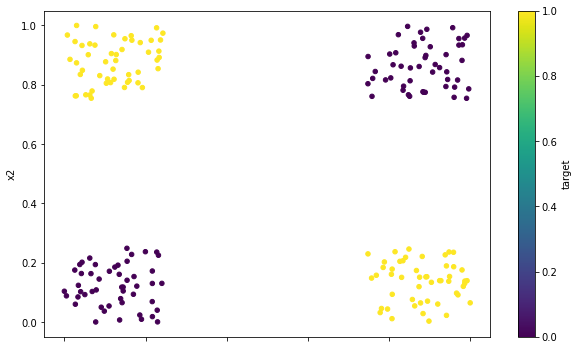

In [ ]:
df_artificial_1.plot.scatter( x='x1', y='x2', c='target', colormap='viridis', figsize=(10,6))

### Logistica

In [ ]:
pipe = pipelineClassifier.make_pipeline(
    
    model_name = 'RBF',
    n_realizations = 20, 
    task='binary_classification',
    func_ativacao_personalizada='logistic',
    qtd_classes=2    

)

acc_artificial, desvio_padrao_artificial, realization_select_artificial, dict_realizations_artificial = pipe.run_realizations(
    
    df=df_artificial_1.copy(), 
    k_fold=5, 
    param_grid={'qt_neurons_hide': [5, 3, 10], 'sigma': [0.1, 2, 3]}, 
    col_target='target', 
    train_size=0.8, 
    stratify=True, 
    normalize=True
)




-----------------------------------------------------------------------------------------------------------------------------
Realização: 0
Start Grid Search k-fold: 5
Confusion Matrix: 
[[20.  0.]
 [ 0. 20.]]
Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 1
Start Grid Search k-fold: 5
Confusion Matrix: 
[[20.  0.]
 [ 0. 20.]]
Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 2
Start Grid Search k-fold: 5
Confusion Matrix: 
[[20.  0.]
 [ 0. 20.]]
Taxa de Acerto: 1.0
-------------------------------------------------

In [ ]:
best_perceptron_artificial = realization_select_artificial['classifier']
best_train_data = realization_select_artificial['train_data']
best_train_data = realization_select_artificial['test_data']
taxa_acerto = realization_select_artificial['taxa_acerto']

print(f'Artificial\nAcurácia: {acc_artificial}\nDesvio Padrao: {desvio_padrao_artificial}')

print('\n- Info best model')
print(f'Taxa Acerto: {taxa_acerto}')

Artificial
Acurácia: 1.0
Desvio Padrao: 0.0

- Info best model
Taxa Acerto: 1.0


### Tangente

In [ ]:
pipe = pipelineClassifier.make_pipeline(
    
    model_name = 'RBF',
    n_realizations = 20, 
    task='binary_classification',
    func_ativacao_personalizada='tangente',
    qtd_classes=2    

)

acc_artificial, desvio_padrao_artificial, realization_select_artificial, dict_realizations_artificial = pipe.run_realizations(
    
    df=df_artificial_1.copy(), 
    k_fold=5, 
    param_grid={'qt_neurons_hide': [5, 3, 10], 'sigma': [0.1, 2, 3]}, 
    col_target='target', 
    train_size=0.8, 
    stratify=True, 
    normalize=True
)




-----------------------------------------------------------------------------------------------------------------------------
Realização: 0
Start Grid Search k-fold: 5
Confusion Matrix: 
[[20.  0.]
 [ 0. 20.]]
Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 1
Start Grid Search k-fold: 5
Confusion Matrix: 
[[20.  0.]
 [ 0. 20.]]
Taxa de Acerto: 1.0
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
Realização: 2
Start Grid Search k-fold: 5
Confusion Matrix: 
[[20.  0.]
 [ 0. 20.]]
Taxa de Acerto: 1.0
-------------------------------------------------

In [ ]:
best_perceptron_artificial = realization_select_artificial['classifier']
best_train_data = realization_select_artificial['train_data']
best_train_data = realization_select_artificial['test_data']
taxa_acerto = realization_select_artificial['taxa_acerto']

print(f'Artificial\nAcurácia: {acc_artificial}\nDesvio Padrao: {desvio_padrao_artificial}')

print('\n- Info best model')
print(f'Taxa Acerto: {taxa_acerto}')

Artificial
Acurácia: 1.0
Desvio Padrao: 0.0

- Info best model
Taxa Acerto: 1.0


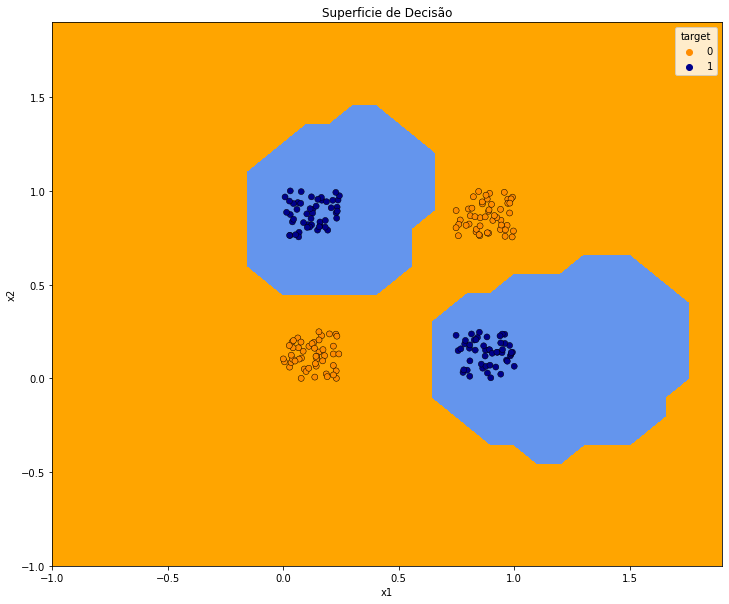

In [ ]:
plots.plot_decision_boundary(
    
    df_artificial_1,
    list_features = ['x1', 'x2'],
    col_target='target',
    model = best_perceptron_artificial,
    task = 'multiclass_classification',
    h=.1
)